In [1]:
import requests, json
import pandas as pd
import datetime as dt

In [2]:
trips_2017_q1= pd.read_csv('/Users/shuhan_zhou/Documents/GitHub/divvy_new/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q1.csv')

In [3]:
trips_2017_q2= pd.read_csv('/Users/shuhan_zhou/Documents/GitHub/divvy_new/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q2.csv')

In [4]:
trips_2017 = trips_2017_q1.append(trips_2017_q2)

In [5]:
trips_2017.set_index('trip_id', inplace=True)

In [6]:
trips_2017.loc[:,'current_year'] = 2017
trips_2017['user_age'] = trips_2017['current_year'] - trips_2017['birthyear']

In [7]:
trips_2017.head()

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,current_year,user_age
trip_id,,,,,,,,,,,,,
13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,2017,28.0
13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,2017,27.0
13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,2017,38.0
13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,2017,32.0
13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,2017,28.0


In [8]:
##analysis of user characteristics
trips_by_gender = trips_2017['gender'].value_counts()
trips_by_age = trips_2017['user_age'].value_counts()
trips_by_usertype = trips_2017['usertype'].value_counts()

In [9]:
trips_by_gender #male use divvy bikes way more often than females 

Male      935854
Female    298784
Name: gender, dtype: int64

In [58]:
average_duration_gender = trips_2017.groupby('gender').tripduration.mean()  #tripduration are in seconds
print(average_duration_gender)

gender
Female    783.663285
Male      673.063025
Name: tripduration, dtype: float64


Females make less trips with divvy bike than males but once female decide to use divvy bikes, they turn to ride longer trips(on average almost 2 mins longer). It is important to note that trip duration does not imply trip distance. Generally females are less athletic and more risk averse so it could be that females simply ride their bikes more slowly. But it is also possible that females only use divvy bike when they are going to further places. Without more information/data on individual usage, we are unable to investigate this question further.  

In [10]:
trips_by_age.head()  #28-year-olds use divvy the most

28.0    76489
26.0    64447
29.0    64041
27.0    63643
30.0    62329
Name: user_age, dtype: int64

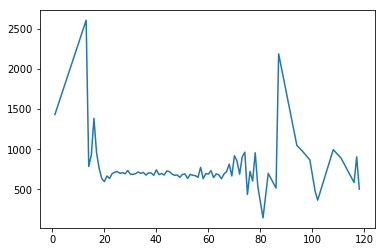

In [61]:
average_duration_age = trips_2017.groupby('user_age').tripduration.mean()  #tripduration are in seconds
plot(average_duration_age)

We do not expect people under the age of 10 or above 90 to use divvy bike for all sorts of reasons (their physical capacity, divvy bike's fit etc). But we can see there are users under the age of 10 and above 100, even 120 years old! we regard these incidences as errors from the entry or simply some people do not wish to disclose their age to divvy. 
Looking at valid observations for users between 20-80 year old. the average trip duration roughly stays the same level (around 600 seconds, i.e. 10 mins). for users aged over 60, it starts to show large variations which is sensible because physical condition for the elders also has large variations which in turn influences the amount of time they feel comfortable riding a bike. 

In [11]:
trips_by_usertype    #way more subscribers than customers

Subscriber    1234339
Customer       317162
Dependent           4
Name: usertype, dtype: int64

In [62]:
average_duration_usertype = trips_2017.groupby('usertype').tripduration.mean()  #tripduration are in seconds
print(average_duration_usertype)

usertype
Customer      1873.963095
Dependent      454.250000
Subscriber     699.741475
Name: tripduration, dtype: float64


One time user (customers) ride divvy bikes much longer than subscriber users (20 mins longer!). Economic intuition can explain this phenomenon: once the "customer" paid their fees, it became a sunk cost, and they want to make the most out of this one time use. Whereas subscribers pay a monthly fee and use divvy bikes more regularly; they can benefit from the number of trips, not necessarily the duration of the trips. Also, we expect subscribers who have full time work/study and more likely to use divvy bikes to travel between fixed points. A portion of "customers" could be tourists who have less time constraint to use divvy.   

In [ ]:
#now we look at the common features of the trips

In [12]:
trips_2017['start_time_formatted'] =  pd.to_datetime(trips_2017['start_time'], format='%m/%d/%Y %H:%M:%S')
trips_2017['end_time_formatted'] =  pd.to_datetime(trips_2017['end_time'], format='%m/%d/%Y %H:%M:%S')

In [13]:
trips_2017['start_time_time']= trips_2017['start_time_formatted'].dt.time
trips_2017['end_time_time']= trips_2017['end_time_formatted'].dt.time
trips_2017['start_date']= trips_2017['start_time_formatted'].dt.date
trips_2017['end_date']= trips_2017['end_time_formatted'].dt.date

In [ ]:
trips_2017.head()

In [14]:
#return day of the week as an integer where Monday is 0 and Sunday is 6
trips_2017['start_day_of_week']= trips_2017['start_time_formatted'].dt.weekday
trips_2017['end_day_of_week']= trips_2017['end_time_formatted'].dt.weekday

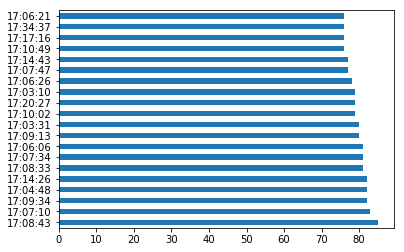

In [15]:
%matplotlib inline
trips_2017['start_time_time'].value_counts()[:20].plot(kind='barh')

In terms of total number of trips of a given time stamp, the top 20 start times are all around 17:00 which is the off-work rush hour for most people. 

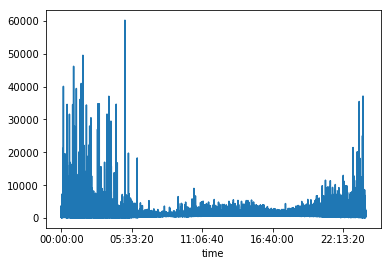

In [55]:
average_duration_time = trips_2017.groupby('start_time_time').tripduration.mean()  #tripduration are in seconds
plot(average_duration_time)

In terms of trip duration, people are making longer trips in the evening and after midnight. There could be two expanations: 1) people are tired after work and turn to ride their bikes slower. 2) people are travelling to further places in the evening. Since the big increase in trip duration happens after 10pm, we can guess that people may ride their bikes after going out ot working late. 

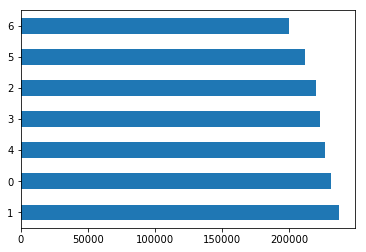

In [19]:
trips_2017['start_day_of_week'].value_counts().plot(kind='barh')

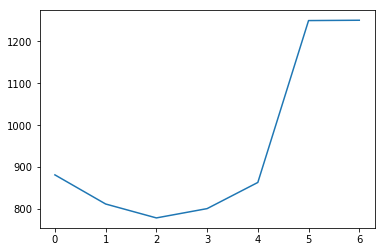

In [56]:
average_duration_day = trips_2017.groupby('start_day_of_week').tripduration.mean()  #tripduration are in seconds
plot(average_duration_day)

People turn to use divvy bikes more on weekdays rather than on weekends. Specifically, Tuesday and Monday are the most
popular time of the week. Interestingly, even though people use divvy bikes less often on the weekends but they do make longer trips. 

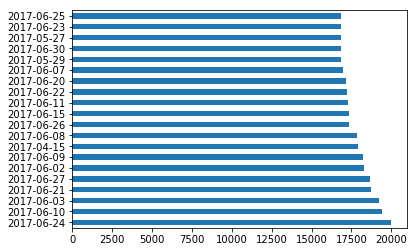

In [20]:
trips_2017['start_date'].value_counts()[:20].plot(kind='barh')

This bar chart shows on June 24 2017, divvy bike usage reached its peak within year 2017. And the top 20 daily usage are all in May and June (except one in April). We are curious whether it is because people like to spend more time biking in the summer. Therefore we produce the time series plot below. 

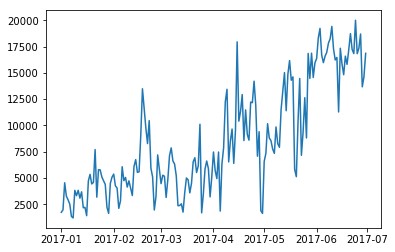

In [49]:
#total daily trips
a = trips_2017.groupby('start_date').size()  #tripduration are in seconds
plot(a)

Generally, the usage of divvy bikes has been increasing in 2017 despite the variations within each month. We can attribute this increase to either 1) divvy has become more popular or expanding its services 2) as weather gets warmer, people are more willing to use divvy bikes. We now test the second hypothesis by examining the duration change over time. 

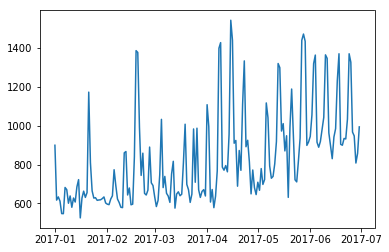

In [46]:
b = trips_2017.groupby('start_date').tripduration.mean()  #tripduration are in seconds
plot(b)

From the plot above, we can see average trip duration increased from January to July, verifying the assumption that people are willing to spend more time on their divvy bikes as the weather gets warmer. 